In [317]:
import numpy as np
import pandas as pd

In [403]:
data = pd.read_csv("d:\maschineLearning\zoomcamp\week2\housing.csv")

In [319]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [320]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [321]:
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [322]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [323]:
import matplotlib.pyplot as plt
import seaborn as sns

In [324]:
plt.rcParams['figure.figsize'] = 6, 3

<AxesSubplot:xlabel='longitude', ylabel='Count'>

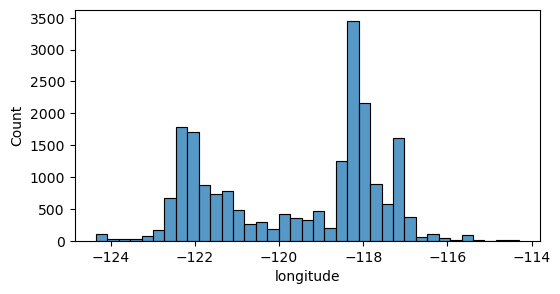

In [325]:
sns.histplot(data['longitude'])

<AxesSubplot:xlabel='latitude', ylabel='Count'>

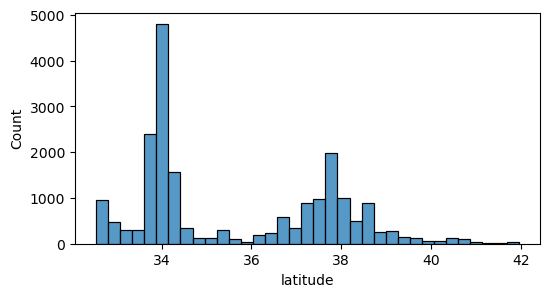

In [326]:
sns.histplot(data['latitude'])

<AxesSubplot:xlabel='housing_median_age', ylabel='Count'>

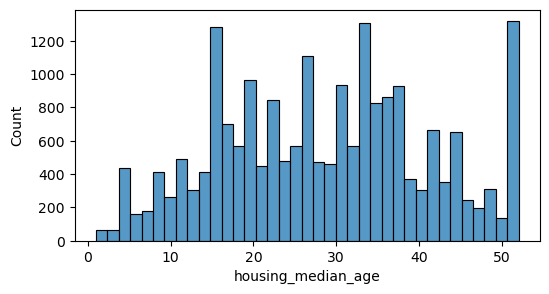

In [327]:
sns.histplot(data['housing_median_age'])

<AxesSubplot:xlabel='total_rooms', ylabel='Count'>

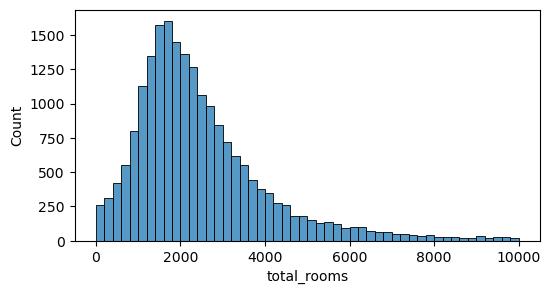

In [328]:
sns.histplot(data['total_rooms'][data['total_rooms']<10000], bins = 50)

<AxesSubplot:xlabel='total_bedrooms', ylabel='Count'>

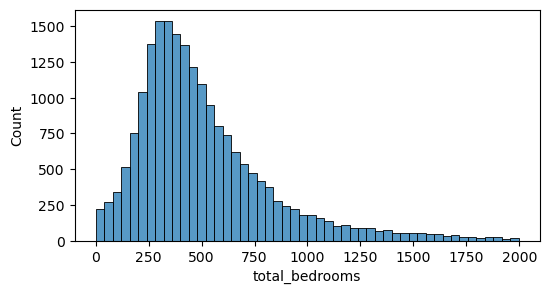

In [329]:
sns.histplot(data['total_bedrooms'][data['total_bedrooms']<2000], bins = 50)

<AxesSubplot:xlabel='population', ylabel='Count'>

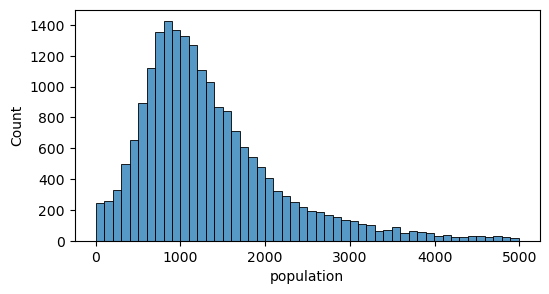

In [330]:
sns.histplot(data['population'][data['population']<5000], bins =50)

<AxesSubplot:xlabel='households', ylabel='Count'>

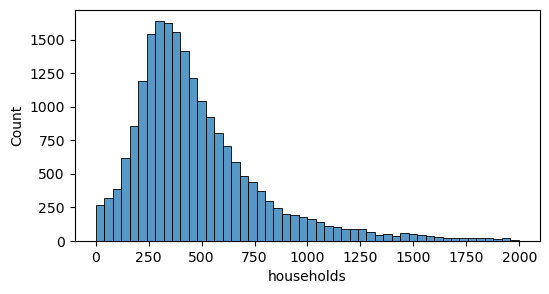

In [331]:
sns.histplot(data['households'][data['households']<2000], bins = 50)

<AxesSubplot:xlabel='median_income', ylabel='Count'>

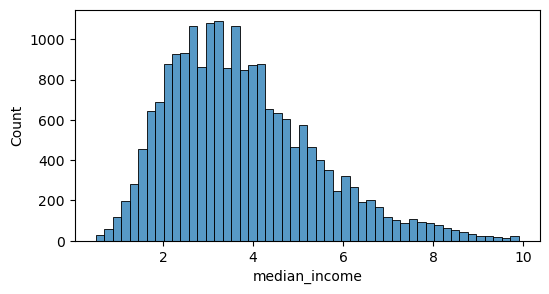

In [332]:
sns.histplot(data['median_income'][data['median_income']<10], bins = 50)

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

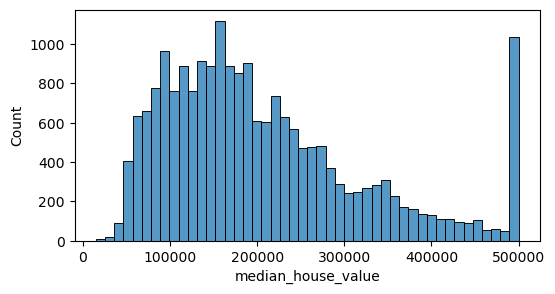

In [333]:
sns.histplot(data['median_house_value'])

<AxesSubplot:xlabel='ocean_proximity', ylabel='Count'>

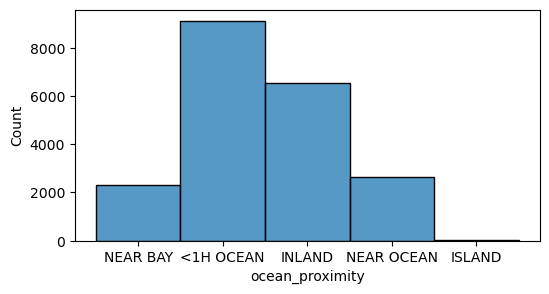

In [334]:
sns.histplot(data['ocean_proximity'])

In [335]:
df = data.copy()

In [336]:
df = df[['latitude', 'longitude','housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']]

In [337]:
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [338]:
df.isnull().sum()   #Q1

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [339]:
df['population'].median() #Q2 ?

1166.0

In [340]:
n = len(df)
n_val =int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test
n_val, n_test, n_train

(4128, 4128, 12384)

In [341]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [342]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [343]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20046,36.06,-119.01,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
3024,35.14,-119.46,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
15663,37.80,-122.44,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
20484,34.28,-118.72,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
9814,36.62,-121.93,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0


In [344]:
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [345]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [346]:
y_train = np.log1p(df_train['median_house_value'].values)
y_val = np.log1p(df_val['median_house_value'].values)
y_test = np.log1p(df_test['median_house_value'].values)

In [347]:
len(y_train), len(y_val), len(y_test)

(12384, 4128, 4128)

In [348]:
del df_train['median_house_value']
del df_test['median_house_value']
del df_val['median_house_value']

In [349]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,36.06,-119.01,25.0,1505.0,NaN,1392.0,359.0,1.6812
1,35.14,-119.46,30.0,2943.0,NaN,1565.0,584.0,2.5313
2,37.80,-122.44,52.0,3830.0,NaN,1310.0,963.0,3.4801
3,34.28,-118.72,17.0,3051.0,NaN,1705.0,495.0,5.7376
4,36.62,-121.93,34.0,2351.0,NaN,1063.0,428.0,3.7250


In [350]:
df_train.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
dtype: int64

In [351]:
features_na0_train = df_train.fillna(0).values



In [352]:
mean = df_train['total_bedrooms'].mean()
mean

533.4803317730147

In [353]:
features_na_mean_train = df_train.fillna(mean).values

In [354]:
features_na_mean_train 

array([[ 3.6060e+01, -1.1901e+02,  2.5000e+01, ...,  1.3920e+03,
         3.5900e+02,  1.6812e+00],
       [ 3.5140e+01, -1.1946e+02,  3.0000e+01, ...,  1.5650e+03,
         5.8400e+02,  2.5313e+00],
       [ 3.7800e+01, -1.2244e+02,  5.2000e+01, ...,  1.3100e+03,
         9.6300e+02,  3.4801e+00],
       ...,
       [ 3.8980e+01, -1.2091e+02,  1.3000e+01, ...,  3.2640e+03,
         1.1980e+03,  3.6530e+00],
       [ 3.4090e+01, -1.1772e+02,  3.6000e+01, ...,  7.8500e+02,
         2.9900e+02,  3.2566e+00],
       [ 3.7760e+01, -1.2247e+02,  3.4000e+01, ...,  1.1520e+03,
         4.4500e+02,  5.1893e+00]])

In [355]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [356]:
def model_predict(X, w_0, w):
    y_pred = w_0 + X.dot(w)
    return y_pred

In [357]:
def rmse(y, y_pred):
    se = (y-y_pred)**2
    mse = se.mean()
    return np.sqrt(mse)

In [358]:
w_0_na0, w_na0 = train_linear_regression(features_na0_train, y_train)

In [359]:
y_pred_na0 = model_predict(features_na0_train, w_0_na0, w_na0)
type(y_pred_na0), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [360]:
rmse_train_na0 = round(rmse(y_train, y_pred_na0), 2)
rmse_train_na0

0.34

In [361]:
w_0_na_mean, w_na_mean = train_linear_regression(features_na_mean_train, y_train)
y_pred_na_mean = model_predict(features_na_mean_train, w_0_na_mean, w_na_mean)
rmse_train_na_mean = round(rmse(y_train, y_pred_na_mean), 2)
rmse_train_na_mean

0.34

# Validation model Q3

In [362]:
features_na0_val = df_val.fillna(0).values
y_pred_na0 = model_predict(features_na0_val, w_0_na0, w_na0)
rmse_val_na0 = round(rmse(y_val, y_pred_na0), 2)
rmse_val_na0

0.33

In [363]:
y_pred_na_mean = model_predict(features_na_mean_val, w_0_na_mean, w_na_mean)
rmse_val_na_mean = round(rmse(y_val, y_pred_na_mean), 2)
rmse_val_na_mean

0.33

# Regularization

In [364]:
features_na0_train = df_train.fillna(0).values

In [365]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r*np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)    
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [366]:
r = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10] #Q4 0.01? или 0?
score = []
for reg in r:
    w_0, w = train_linear_regression_reg(features_na0_train, y_train, reg)
    y_pred_val = model_predict(features_na0_val, w_0, w)
    score.append(rmse(y_pred_val, y_val))
score

[0.329533036523912,
 0.3295330361644933,
 0.3295330009701873,
 0.3295327038670615,
 0.32953193659943614,
 0.3296947205389722,
 0.33378872199973053,
 0.33924853455008347,
 0.34060638078081384]

In [367]:
np.array(score).min()

0.32953193659943614

In [368]:
score.index(np.array(score).min())

4

# Seed for splitting

In [413]:
df = data.copy()
df = df[['latitude', 'longitude','housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']]
n = len(df)
n_val =int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test

In [414]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [415]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 20637, 20638, 20639])

In [416]:
def prepare_data(df, idx):
    df = df.fillna(0)
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train + n_val]]
    df_test = df.iloc[idx[n_train + n_val:]]
    y_train = np.log1p(df_train['median_house_value'].values)
    y_val = np.log1p(df_val['median_house_value'].values)
    y_test = np.log1p(df_test['median_house_value'].values)
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    df_train.reset_index(drop = True).values
    df_val.reset_index(drop = True).values
    df_test.reset_index(drop = True).values
    return df_train, df_val, df_test, y_train, y_val, y_test

In [417]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [418]:
def model_predict(X, w_0, w):
    y_pred = w_0 + X.dot(w)
    return y_pred

In [419]:
def model_predict(X, w_0, w):
    y_pred = w_0 + X.dot(w)
    return y_pred

In [420]:
scores = []
for seed in seeds:
    np.random.seed(seed)
    np.random.shuffle(idx)
    df_train, df_val, df_test, y_train, y_val, y_test = prepare_data(df, idx)
    w_0, w = train_linear_regression(df_train, y_train)
    y_pred_val = model_predict(df_val, w_0, w)
    scores.append(round(rmse(y_val, y_pred_val), 3))
scores   

[0.339, 0.339, 0.349, 0.342, 0.348, 0.344, 0.349, 0.34, 0.341, 0.338]

In [421]:
std = round(np.std(scores), 3)
std

0.004

# Question 6

In [423]:
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

In [424]:
df_train, df_val, df_test, y_train, y_val, y_test = prepare_data(df, idx)

In [425]:
df_full_train = pd.concat([df_train, df_val])

In [427]:
df_full_train = df_full_train.reset_index(drop = True)

In [432]:
X_full_train = df_full_train.values

In [434]:
y_full_train = np.concatenate([y_train, y_val])

In [437]:
w_0, w = train_linear_regression_reg(X_full_train, y_full_train, 0.001)
w_0, w

(-11.407983347664988,
 array([-2.76748454e-01, -2.71992083e-01,  3.36619692e-03, -2.14014248e-05,
         2.47085669e-04, -1.72981187e-04,  4.51800359e-04,  1.76299970e-01]))

In [439]:
y_pred_test = model_predict(df_test, w_0, w)
y_pred_test

168      11.959332
17299    12.070807
10347    12.629100
846      12.446305
12920    11.828059
           ...    
4532     11.849331
4673     12.399151
5014     11.885552
9979     11.774544
501      11.973123
Length: 4128, dtype: float64

In [440]:
y_test

array([11.73607702, 12.6581064 , 12.52088703, ..., 11.63160588,
       11.49680625, 11.57402997])

In [442]:
score = rmse(y_test, y_pred_test)
score

0.3453168914364631